## Decision Tree

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kashifliaqat/Data_Science_and_Machine-Learning/blob/main/Supervised_Learning/7_Decision_Trees/Decision_Trees.ipynb)

**Task:** Use decision tree algorithm to perform classification to predict whether a patient has diabetes or not.

The [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) is a collection of medical data from female patients of Pima Indian heritage. The dataset contains information on various medical variables, including glucose level, blood pressure, and body mass index, and their relation to the onset of diabetes in the patients.

The dataset consists of 9 variables:

1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age in years
9. Outcome: Class variable (0 or 1)  indicating whether or not the patient developed diabetes within 5 years of the initial examination. A value of 1 indicates that the patient developed diabetes, while a value of 0 indicates that they did not develop diabetes.

In [1]:
# import libraries
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


In [2]:
#import data
df = pd.read_csv("https://raw.githubusercontent.com/kashifliaqat/Data_Science_and_Machine-Learning/main/Supervised_Learning/6_k_Nearest_Neighbors/dataset/diabetes.csv")
# check for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Data Visualization and Exploration
A detailed visualization and exploration of the dataset can be found in the [K-Nearest Neighbors](https://github.com/kashifliaqat/Data_Science_and_Machine-Learning/blob/main/Supervised_Learning/6_k_Nearest_Neighbors/kNN_Classification.ipynb) notebook.

In [3]:
# Display data information
print("Data Information:")
print(df.info())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


The dataset contains 9 columns, where the Outcome column is the target variable that we are trying to predict. 

In [4]:
# Print the first 5 rows to check the data
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### Data splitting and scaling
Split the data into features and target variables. Then, split the data into training and testing sets. Finally, scale the data.


In [5]:
# Split the data into X (features) and y (target variable)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building and Training
A step-by-step breakdown of the implementation:

1. Initialize a `DecisionTreeClassifier` object `dt` with hyperparameters `max_depth=3`, `criterion='gini'`, and `splitter='best'`.
2. Use cross-validation with 5 folds to evaluate the accuracy of the model on the training set. The `cross_val_score` function calculates the accuracy of the model for each fold and returns an array of scores. The `scores.mean()` method calculates the average score across all folds and assigns it to `mean_cv_score`.
3. Train the `dt` model on the entire training set using the `fit` method with `X_train` and `y_train` as arguments.
4. Print the mean cross-validation accuracy `mean_cv_score`.


In [6]:
# create Decision Tree model
dt = DecisionTreeClassifier(max_depth=3, criterion='gini', splitter='best')

# perform 5-fold cross-validation and calculate mean accuracy
cv_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
mean_cv_score = cv_scores.mean()

# train the Decision Tree model on the entire training set
dt.fit(X_train, y_train)

# print mean cross-validation accuracy and accuracy score
print(f'Mean CV Accuracy: {mean_cv_score:.2f}')

Mean CV Accuracy: 0.76


### Model Evaluation

In [7]:
# Evaluate the model on the training set
y_train_pred = dt.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

# Evaluate the model on the testing set
y_test_pred = dt.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores
print(f"Training accuracy: {train_acc:.3f}")
print(f"Testing accuracy: {test_acc:.3f}")

# Print the classification report
print(classification_report(y_test, y_test_pred))

Training accuracy: 0.777
Testing accuracy: 0.760
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



- The model is able to achieve testing accuracy of 76%. 

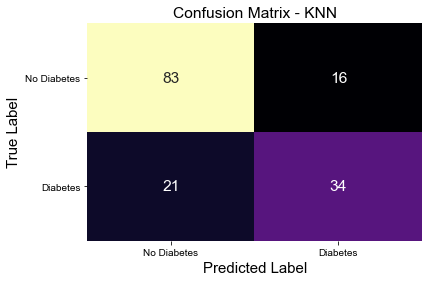

In [8]:
# Plot confusion matrix
# Import metrics from sklearn 
from sklearn import metrics
# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#Plot confusion matrix
plt.figure(figsize=(6, 4))
ax = plt.axes()
sns.set(font_scale=1.3)
sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)
ax.set_title("Confusion Matrix - KNN")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["No Diabetes", "Diabetes"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["No Diabetes", "Diabetes"], rotation=0)
plt.show()

### Hyperparameter Tuning Using GridSearchCV

`GridSearchCV` is a method in scikit-learn that performs an exhaustive search over a specified parameter grid to find the optimal combination of hyperparameters for a machine learning model. 


In [10]:
# import GridSearchCV 
from sklearn.model_selection import GridSearchCV

# define parameter grid
param_grid = {'max_depth': [2, 3, 4, 5],
              'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random']}

# create Decision Tree model
dt = DecisionTreeClassifier()

# create GridSearchCV object
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# fit the grid search object to the data
grid_search.fit(X_train, y_train)

# extract the best estimator and its score
best_dt = grid_search.best_estimator_
best_score = grid_search.best_score_

# predict class labels for test set using the best estimator
y_pred = best_dt.predict(X_test)

# print accuracy score and classification report
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.7662337662337663
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



- Accuracy is slightly improved (less than 1%) using GridSearchCV.

#### Calculate AUC Score and Plot ROC Curve
The ROC curve is useful for selecting the best threshold value for making predictions based on the trade-off between sensitivity and specificity. The area under the curve (AUC) is a metric that summarizes the overall performance of the classifier, with a perfect classifier having an AUC of 1.
<p align="center"><img src="https://github.com/kashifliaqat/Data_Science_and_Machine-Learning/raw/main/Images/roc_curve.svg" alt="ROC Curve" width="500" height="300">

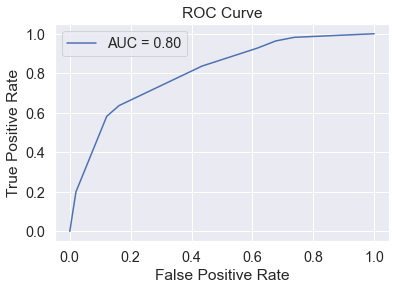

AUC: 0.80


In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

# predict class probabilities for test set
y_prob = best_dt.predict_proba(X_test)[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, y_prob)

# plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# print AUC value
print(f'AUC: {auc:.2f}')

### Comparison with K-Nearest Neighbors
The [KNN model](https://github.com/kashifliaqat/Data_Science_and_Machine-Learning/blob/main/Supervised_Learning/6_k_Nearest_Neighbors/kNN_Classification.ipynb) was able to achieve a testing accuracy of 76%, while the decision tree model achieved a testing accuracy of 77%. The decision tree model was able to achieve a slightly higher accuracy than the KNN model.
- However the AUC score for the KNN model (0.82) is slightly higher than the decision tree model. This means that the KNN model is better at predicting the positive class (patients with diabetes) than the decision tree model.